# Albert Szulc, 141321

# Zadanie domowe - analiza eksploracyjna + test statystyczny

In [166]:
Dane <- read.csv("insurance.csv") # https://www.kaggle.com/mirichoi0218/insurance
Dane

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622
46,female,33.440,1,no,southeast,8240.590
37,female,27.740,3,no,northwest,7281.506
37,male,29.830,2,no,northeast,6406.411
60,female,25.840,0,no,northwest,28923.137


# 1. Opis danych

Dane składają się z losowo wybranej próby osób mających wykupione ubezpieczenie zdrowotne w USA. Kryją się w nich zależność różnych cech pacjenta jak wiek, płeć, BMI, ilość dzieci, czy osoba jest paląca, z jakiego regionu USA pochodzi (możliwe 4 wartości) do kosztu ubezpieczenia zdrowotnego. Próba jest dosyć duża, bo zawiera ponad 1300 rekordów z danymi. Wydaję się, że przy takiej liczności danych można ze sporą mocą formułować twierdzenia na ich podstawie.

# 2. Analiza eksploracyjna (ceny ubezpieczeń)

In [170]:
attach(Dane)
# detach(Dane)

The following objects are masked from Dane (pos = 3):

    age, bmi, charges, children, region, sex, smoker



## Podstawowe statysyki opisowe dla wysokości opłaty

### Liczność próby

In [167]:
n <- length(charges)
n

[1] 1338

### Średnia

In [168]:
avg <- mean(charges)
avg

[1] 13270.42

### Mediana

In [169]:
med <- median(charges)
med

[1] 9382.033

### Wartość minimalna

In [177]:
min_value <- min(charges)
min_value

[1] 1121.874

### Wartość maksymalna

In [178]:
max_value <- max(charges)
max_value

[1] 63770.43

### Wariancja

In [8]:
vr <- var(charges)
vr

[1] 146652372

### Odchylenie standardowe

In [9]:
std <- sd(charges)
std

[1] 12110.01

### Skośność

In [10]:
skew <- sum((charges - avg)^3)/(n * std^3)
skew

[1] 1.512483

### Kurtoza

In [172]:
kurt <- sum((charges - avg)^4)/(n * vr^2)
kurt

[1] 4.588954

Z podstawowych statystyk opisowych można wywnioskować kilka istotnych faktów:
- mamy sporty rozstrzał danych patrząc po różnicy pomiędzy wartością maksymalną i minimalną
- odchylenie standardowe bliskie wartości średniej arytmetycznej wksazuje na sporą zmienność danych
- ze skośności można odczytać, że dane są pochylone "dodatnio" (asymetra prawostronna) natomiast wartość kurtozy mówi nam, że dane są dosyć mocno skupione

## Szerg rozdzielczy

In [175]:
quantile(charges, 3/4) - quantile(charges, 1/4)

75% 
11899.63

### Liczba przedziałów = $\sqrt{n}$

In [198]:
num_of_breaks <- round(sqrt(n))
width <- (max_value - min_value)/num_of_breaks
width <- ceiling(width)
paste("Wartość minimalna: ", min_value)
paste("Wartość minimalna przedziału: ", floor(min_value))
paste("Wartość maksymalna: ", max_value)
paste("Wartość maksymalna przedziału: ", ceiling(max_value))
paste("Liczba przedziałów: ", num_of_breaks)
paste("Szerokość przedziału: ", width)

[1] "Wartosc minimalna:  1121.8739"

[1] "Wartosc minimalna przedzialu:  1121"

[1] "Wartosc maksymalna:  63770.42801"

[1] "Wartosc maksymalna przedzialu:  63771"

[1] "Liczba przedzialów:  37"

[1] "Szerokosc przedzialu:  1694"

In [203]:
paste("Skonstruowany szereg rozdzielczy: ")
cur <- floor(min_value)
for (i in 1:num_of_breaks){
    print(paste("(",cur,",",cur+width,"]"))
    cur <- cur + width
}

[1] "Skonstruowany szereg rozdzielczy: "

[1] "( 1121 , 2815 ]"
[1] "( 2815 , 4509 ]"
[1] "( 4509 , 6203 ]"
[1] "( 6203 , 7897 ]"
[1] "( 7897 , 9591 ]"
[1] "( 9591 , 11285 ]"
[1] "( 11285 , 12979 ]"
[1] "( 12979 , 14673 ]"
[1] "( 14673 , 16367 ]"
[1] "( 16367 , 18061 ]"
[1] "( 18061 , 19755 ]"
[1] "( 19755 , 21449 ]"
[1] "( 21449 , 23143 ]"
[1] "( 23143 , 24837 ]"
[1] "( 24837 , 26531 ]"
[1] "( 26531 , 28225 ]"
[1] "( 28225 , 29919 ]"
[1] "( 29919 , 31613 ]"
[1] "( 31613 , 33307 ]"
[1] "( 33307 , 35001 ]"
[1] "( 35001 , 36695 ]"
[1] "( 36695 , 38389 ]"
[1] "( 38389 , 40083 ]"
[1] "( 40083 , 41777 ]"
[1] "( 41777 , 43471 ]"
[1] "( 43471 , 45165 ]"
[1] "( 45165 , 46859 ]"
[1] "( 46859 , 48553 ]"
[1] "( 48553 , 50247 ]"
[1] "( 50247 , 51941 ]"
[1] "( 51941 , 53635 ]"
[1] "( 53635 , 55329 ]"
[1] "( 55329 , 57023 ]"
[1] "( 57023 , 58717 ]"
[1] "( 58717 , 60411 ]"
[1] "( 60411 , 62105 ]"
[1] "( 62105 , 63799 ]"


### Długość przedziału = $2.64 * IQR * N^{-1/3}$

In [206]:
width <- 2.64 * IQR(charges) * n^(-1/3)
width <- ceiling(width)
num_of_breaks <- ceiling((max_value - min_value)/width)
paste("Wartość minimalna: ", min_value)
paste("Wartość minimalna przedziału: ", floor(min_value))
paste("Wartość maksymalna: ", max_value)
paste("Wartość maksymalna przedziału: ", ceiling(max_value))
paste("Liczba przedziałów: ", num_of_breaks)
paste("Szerokość przedziału: ", width)

[1] "Wartosc minimalna:  1121.8739"

[1] "Wartosc minimalna przedzialu:  1121"

[1] "Wartosc maksymalna:  63770.42801"

[1] "Wartosc maksymalna przedzialu:  63771"

[1] "Liczba przedzialów:  22"

[1] "Szerokosc przedzialu:  2851"

In [208]:
paste("Skonstruowany szereg rozdzielczy: ")
cur <- floor(min_value)
for (i in 1:num_of_breaks){
    print(paste("(",cur,",",cur+width,"]"))
    cur <- cur + width
}

[1] "Skonstruowany szereg rozdzielczy: "

[1] "( 1121 , 3972 ]"
[1] "( 3972 , 6823 ]"
[1] "( 6823 , 9674 ]"
[1] "( 9674 , 12525 ]"
[1] "( 12525 , 15376 ]"
[1] "( 15376 , 18227 ]"
[1] "( 18227 , 21078 ]"
[1] "( 21078 , 23929 ]"
[1] "( 23929 , 26780 ]"
[1] "( 26780 , 29631 ]"
[1] "( 29631 , 32482 ]"
[1] "( 32482 , 35333 ]"
[1] "( 35333 , 38184 ]"
[1] "( 38184 , 41035 ]"
[1] "( 41035 , 43886 ]"
[1] "( 43886 , 46737 ]"
[1] "( 46737 , 49588 ]"
[1] "( 49588 , 52439 ]"
[1] "( 52439 , 55290 ]"
[1] "( 55290 , 58141 ]"
[1] "( 58141 , 60992 ]"
[1] "( 60992 , 63843 ]"


Z dwóch skonstruowanych szeregów ten drugi wydaje się być bardziej odpowiedni ze względu na mniejszą ilość przedziałów (22 do 37), która i tak nie jest mała. Dlatego to właśnie tego drugiego użyje do konstrukcji histogramu. 

## Histogram

In [209]:
create_hist <- function (dane, k=1) {
    len_of_breaks <- 2.64 * IQR(dane) * n^(-1/3) * k
    num_of_breaks <- ceiling((max(dane) - min(dane))/len_of_breaks)
    hist(dane, col='#4ea4cc',breaks=num_of_breaks, main = paste("Charges, asked breaks:",num_of_breaks))
}

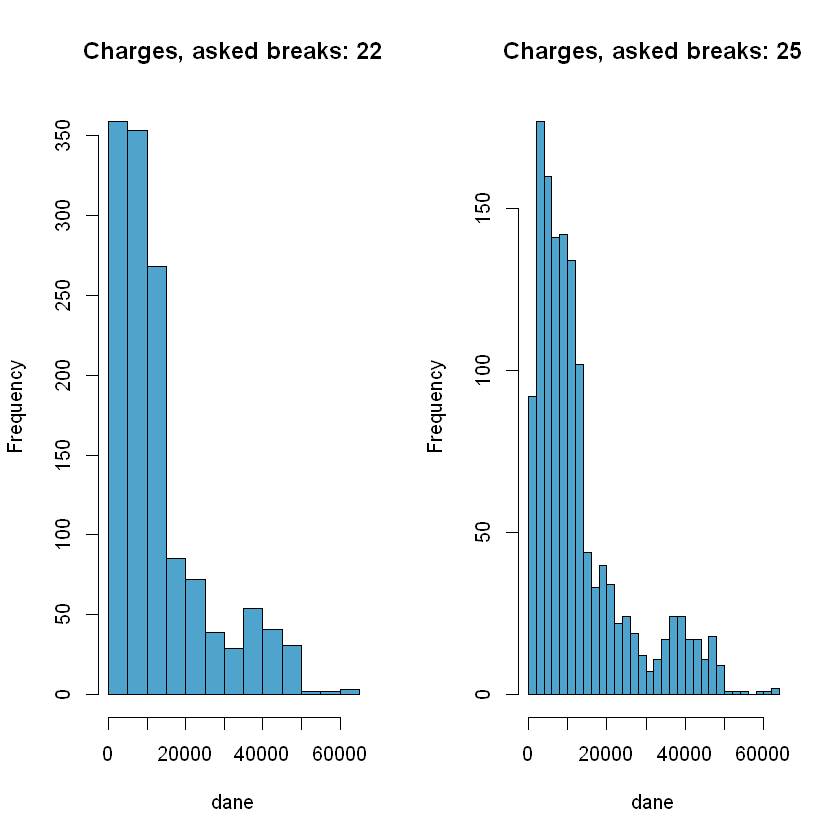

In [210]:
prev <- par(mfrow=c(1,2))
create_hist(charges, 1)
create_hist(charges, 0.9)
par(prev)

Do obliczenia długości przedziałów zastosowałem wzór $h = 2.64 * IQR * n^{-1/3}$. Na podstawie długości tych przedziałów został zbudowany histogram. Wydał mi się on jednak dosyć ogólny, dlatego zmniejszając długość przedziałów do 90% z h udało mi się uzyskać bardziej szczegółowy histogram. <br> Histogram po lewo jest bardziej ogólny, jednak i tak dobrze odzwierciedla główne mody lokalne na 2/3 oraz 36/37 tysiącach dolarów. Na prawym histogramie natomiast możemy bardziej szczegółowo przyjrzeć się danym i można dostrzec dodatkowe mody lokalne np. na 20 tys, oraz znaczny spadek liczby osób płacących najniższe składki poniżej 2 tys dolarów. <br> Uważam, że oba te histogramy znajdą swoje zastosowania.

## Koszt ubezpieczenia, w zależności od BMI

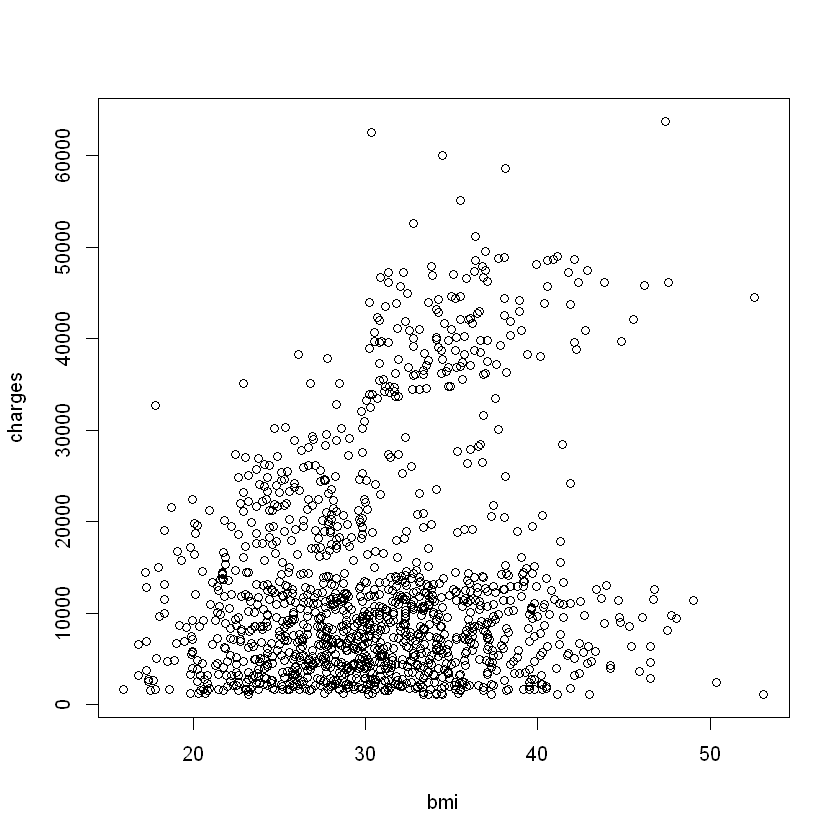

In [16]:
plot(charges ~ bmi)

Z wykresu można dostrzec pewną zależność, że osoby które mają BMI<30 płacą mniej niż osoby mające ten wskaźnik wyższy. Należy jednak sprawdzić wskaźniki korelacji i regresji by wykazać zależność. 

### Wpółczynnik korelacji

In [17]:
cor.test(charges,bmi)


	Pearson's product-moment correlation

data:  charges and bmi
t = 7.3966, df = 1336, p-value = 2.459e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1463052 0.2492822
sample estimates:
     cor 
0.198341 


P-value dla testu t dla współczynnika korelacjila każdego sensowengo poziomu istotności(0.05,0.01,0.001...) odrzuciłby hipotezę zerową, zakładającą brak zależności między zmiennymi.

In [18]:
cor(charges, bmi)

[1] 0.198341

Współczynnik korelacji przyjmuje zbyt małą wartość, by można jasno wskazać, że taka zależność ma znaczącą wartość. Tym bardzij budowanie modelu regresji nie ma sensu.
<br> Mimo tego, że z wykresu można wyciągnąć pewne wnioski i test t dla korelacji odrzucił hipotezę zerową to nie jest wystarczająco mocna korelacja.

# Koszt ubezpieczenia w zależności od faktu palenia papierów

[1] "Smoker: median =  34456.34845 , standard deviation =  11541.5471755891"

[1] "No smoker: median =  7345.4053 , standard deviation =  5993.78181919493"

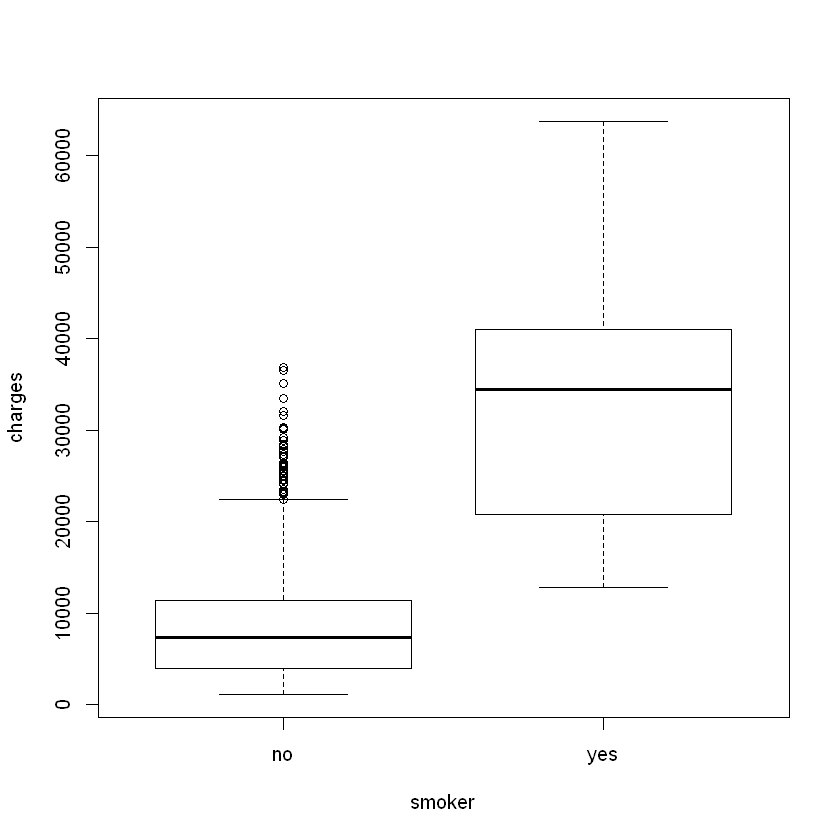

In [19]:
plot(charges ~ smoker)
name <- c('Smoker', 'No smoker')
med <- c(median(charges[smoker == 'yes']), median(charges[smoker == 'no']))
paste('Smoker: median = ', median(charges[smoker == 'yes']), ', standard deviation = ', sd(charges[smoker == 'yes']))
paste('No smoker: median = ', median(charges[smoker == 'no']), ', standard deviation = ', sd(charges[smoker == 'no']))

Tutaj zdecydownie można dostrzec trend, że ludzie palący płacą za ubezpieczenie zdrowotne znacznie więcej.

# 3. Testy

## Test 1. Średnia koszt ubezpieczenia (test dla jednej populacji)

Wykonajmy test dla średniej wartości opłaty w populacji. Jako, że próba jest duża (>1000) to żeby móc sprawidzić więcej rzeczy i uczynić testy ciekawszymi uznajmy, że nasza próba jest populacją z której będziemy wybierać losowo próby.

### Centralne Twierdzenie Graniczne

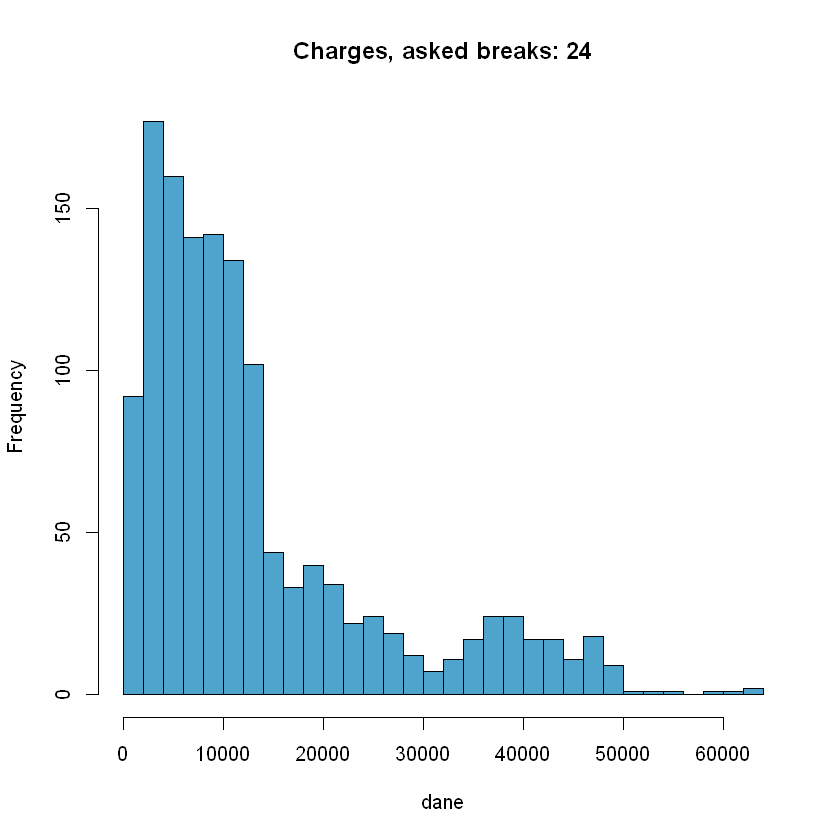

In [20]:
create_hist(charges, k=0.9)

Z histogramu, który pozwoliłem sobie pokazać jescze raz, wyraźnie widać, że rozkład "populacji" jest mocno dodatnie skośny. Sprawdźmy dla jakiej próby można uznać, że mamy do czynienia z rozkładem normalnym dla wartości średniej.

In [211]:
clt_plot <- function(samp_size, data, k=25) {
    my_mean <- c()
    for (var in 1:2000)
        {
        my_sample <- data[sample.int(n,samp_size, replace = TRUE)]
        my_mean <- c(mean(my_sample),my_mean)
    }
    hist(my_mean, col='#4ea4cc',breaks=k, main = paste("Rozmiar próbki: ",samp_size), xlab = "Koszt ubezpieczenia", ylab = "Częstość występowania")
}

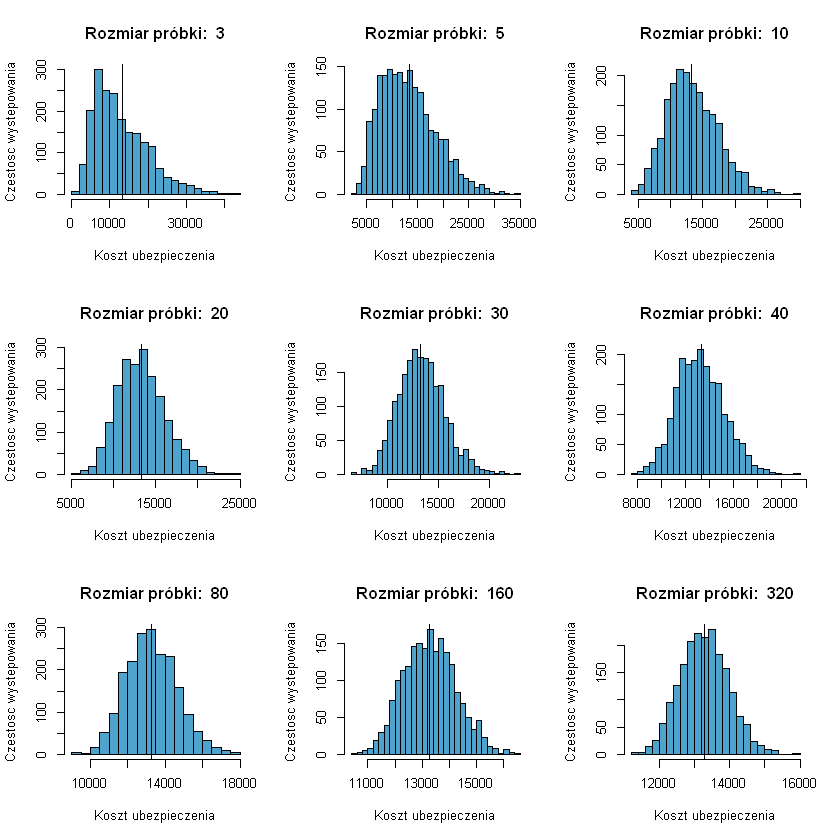

In [213]:
sample_size <- c(3,5,10,20,30,40,80,160,320)
prev <- par(mfrow=c(3,3))
num_of_breaks <- 25
for (i in 1:9){
    clt_plot(sample_size[i], charges, num_of_breaks)
    abline(v=mean(charges))
}
par(prev)

Zostało przedstawionych 9 histogramów dla prób o różnych wielkościach. Pionowa linia oznacza średnią arytmetyczną. <br>
Histogramy dla próbki o rozmiarach 3 i 5 na pierwszy rzut oka nie przypominają rozkładu normalnego. Co oznacza, że dla tak małych próbek nie możemy zastosować testu Z. Nie moglibyśmy również zastosować testu T ponieważ rozkład populacji nie jest normalny. <br>
Dla próbek o rozmiarze 10 i 20 rozkład coraz mocniej przypomina normalny, wciaż można zauważyć jednak pewną skośność. Widzimy, że punkt o największej częstotliwości znajduje się po lewo od średniej. <br>
Od próbek o rozmiarze 30 rozkład jest już bardzo podobny do rozkładu normalnego, dlatego ten punkt (30) wyznaczył bym jako granicę od której można uznać, że rozkład średniej jest normalny. 

# Test Z i T dla jednej populacji

Z powyższego rozumowania ustaliłem minimalną próbkę jaką powinienem pobrać jako 30. Dla większej precyzji zwiększam jednak próbkę do 35. Próbkę wylosowałem za pomocą generatora liczb losowych.

### Test Z

Srawdźmy, przy pomocy testu Z (skoro założona duża próba moich danych jest populacją to znamy jej wariancję!) czy średnia wartość opłaty za ubezpieczenie zdrowotne równa się 13000\\$.
<br> H0: $\mu = 13000$, <br> H1: $\mu \neq 13000$ <br> $\alpha = 0.05$

In [214]:
my_sample <- charges[c(1255,734,617,746,618,680,158,528,1217,1210,382,630,909,439,500,572,267,378,547,525,681,22,1189,904,1332, 1323, 409, 773, 219, 677, 177, 191, 922, 309, 714)]
x_mean <- mean(my_sample)
Z <- (x_mean-13000)*sqrt(35)/(std)
paste("Wartość średniej: ", x_mean)
paste("Wartość odchylenia standardowego 'populacji': ", std)
paste("Wartość statystyki Z: ", Z)
paste("P-value: ", 2*(1-pnorm(Z)))

[1] "Wartosc sredniej:  13706.8424834286"

[1] "Wartosc odchylenia standardowego 'populacji':  12110.011236694"

[1] "Wartosc statystyki Z:  0.345312357215392"

[1] "P-value:  0.729859557672598"

P-value jest zdecydowanie większe od poziomu istotności alpha (0.05 << 0.73). Nie odrzucamy więc hipotezy zerowej. <br>
Mimo tego, że patrząc na samą wartość H0 można by stwierdzić, że sporo różni się ona od średniej wartości 'populacji' (13000 do 13700), jednak należy zauważyć, że wartość odchylenia standardowego jest bliska wartości średniej. <br>
Przeprowadźmy jeszcze poglądowo test T.

### Test t

Test t przeprowadzimy na takich samych warunkach jak test T, jednak tym razem wyestymujemy odchylenie standardowe. <br> H0: $\mu = 13000$, <br> H1: $\mu \neq 13000$ <br> $\alpha = 0.05$

In [220]:
my_sample <- charges[c(1255,734,617,746,618,680,158,528,1217,1210,382,630,909,439,500,572,267,378,547,525,681,22,1189,904,1332, 1323, 409, 773, 219, 677, 177, 191, 922, 309, 714)]
x_mean <- mean(my_sample)
T <- (x_mean-13200)*sqrt(35)/(sd(my_sample))
paste("Wartość średniej: ", x_mean)
paste("Wartość odchylenia standardowego 'populacji': ", sd(my_sample))
paste("Wartość statystyki T: ", T)
paste("P-value: ", 2*(1-pt(Z, df = 35 - 2)))

[1] "Wartosc sredniej:  13706.8424834286"

[1] "Wartosc odchylenia standardowego 'populacji':  11007.2502137812"

[1] "Wartosc statystyki T:  0.272413228662105"

[1] "P-value:  0.732051053849549"

Również nie ma podstaw do odrzucenia hipotezy zerowej.

## Test 2. Czy koszt ubezpieczenia jest zależny od płci? (test dla dwóch populacji)

Jako, że nie znamy odchylenia standardowego kosztu ubezpieczenie populacji należało by wykonać test t (próba jest duża, co sprawia, że test Z najprawdopodobniej jest bardzo dobrym przybliżeniem, dlatego na końcu porównamy wyniki) . Test t dla dwóch populacji ma prostszą formę (liczenie stopnii swobody) kiedy wiemy, że wariancje są sobie równe(mogą różnić się nieznacznie). Z pomocą testu F jesteśmy w stanie sprawdzić czy założenie o równych wariancjach jest spełnione.

### Test F

$H0: \sigma_1^2 = \sigma_2^2$ <br>
$H1: \sigma_1^2 \ne \sigma_2^2$ <br>
$\alpha = 0.01$

### Liczba kobiet i mężczyzn w próbie

In [216]:
n_female <- length(Dane[Dane$sex == 'female', ]$smoker)
n_male <- length(Dane[Dane$sex == 'male', ]$smoker)
paste('Liczba kobiet: ', n_female)
paste("Liczba mężczyzn: ", n_male)

[1] "Liczba kobiet:  662"

[1] "Liczba mezczyzn:  676"

### Estymatory wariancji

In [217]:
var_m <- var(charges[sex == 'male'])
var_f <- var(charges[sex == 'female'])

paste("Kobiety: ", var_f)
paste("Mężczyźni: ", var_m)

[1] "Kobiety:  123848048.28851"

[1] "Mezczyzni:  168247513.2882"

### Wartości statystyki F i p-value oraz wykres statystyki F

In [218]:
F <- var_m/var_f
p_value <- 1 - pf(F, df1=var_m-1, df2=var_f-1, lower.tail = TRUE)
paste("Wartość statystyki F: ", F)
paste("P-value: ", p_value)

[1] "Wartosc statystyki F:  1.35849951301824"

[1] "P-value:  0"

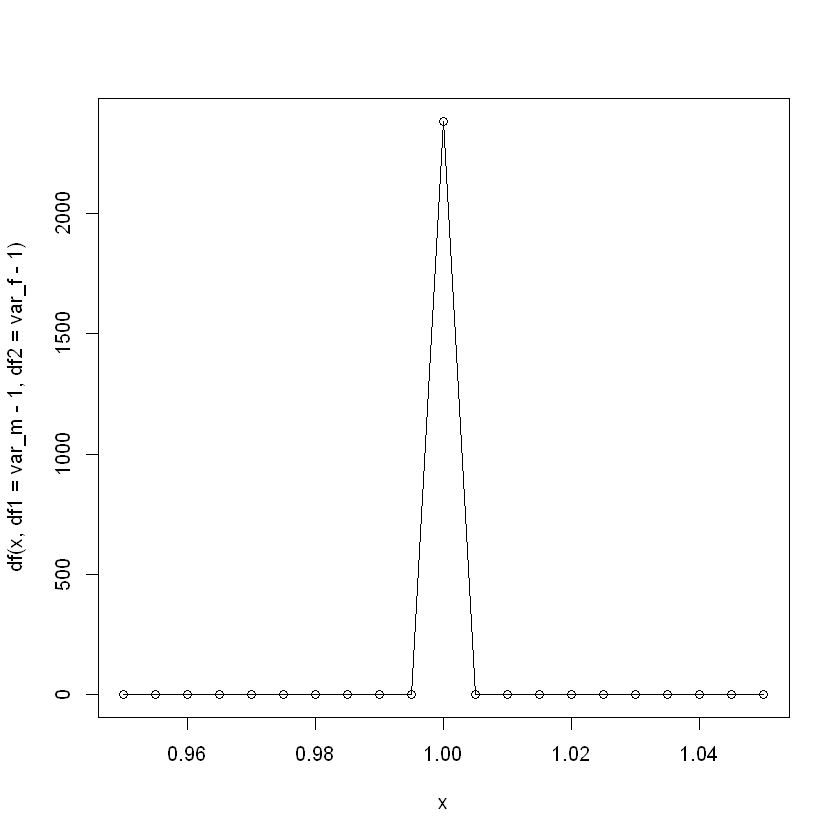

In [219]:
x <- c(190:210/200)
plot(y=df(x,df1=var_m-1, df2=var_f-1), x=x)
lines(y=df(x,df1=var_m-1, df2=var_f-1), x=x)

P-value jest na tyle mała, że R zaokrąglił ją do zera. Przy takiej liczbie stopni swobody nie jest ciężko odrzucić hipoteze zerową (co widać po wykresie). Praktycznie każda wartość statystyki ponieżej, bądź powyżej jeden nakazuje odrzucić H0.
Z tego powodu nie możemy wykonać wersji testu T dla równych wariancji. Próbka jest jednak tak duża, że test Z będzie bardzo dobrym przybliżeniem

### Test Z dwustronny dla dwóch populacji

$H0: \mu_{mężczyzn} = \mu_{kobiet}$, <br> $H1: \mu_{mężczyzn} > \mu_{kobiet}$ <br> $\alpha = 0.01$

### Średnia wartość ubezpieczenia

In [155]:
mean_m <- mean(charges[sex == 'male'])
mean_f <- mean(charges[sex == 'female'])
paste("Kobiety: ", mean_f)
paste("Mężczyźni: ", mean_m)

[1] "Kobiety:  12569.5788438353"

[1] "Mezczyzni:  13956.7511777219"

### Wartość statystki Z i p-value

In [164]:
Z <- (mean_m - mean_f) /(sqrt(var_m/n_male + var_f/n_female))
p_value <- (1 - pnorm(Z))*2
paste("Wartość statystyki Z: ", Z)
paste("P-value: ", p_value)

[1] "Wartosc statystyki Z:  2.10088782323596"

[1] "P-value:  0.0356508145789363"

Przy założonym stopniu istotności nie możemy odrzucić H0 (0.01 < 0.035). Ustaliliśmy jednak dosyć niską $\alpha$. Zwiększając moc test, czyli podwyższając $\alpha$ do 0.05 moglibyśmy odrzucić H0. 

## Test 3. Czy mężczyźni palą częściej niż kobiety (test Z dla dwóch populacji)

Uważa się, że mężczyźni średnio częściej są palaczami niż kobiety. Sprawdźmy to używając testu Z. <br> Przeprowadźmy test jednostronny: <br> H0: $\mu_{mężczyzn} = \mu_{kobiet}$, <br> H1: $\mu_{mężczyzn} > \mu_{kobiet}$ <br> $\alpha = 0.01$

### Liczba kobiet i mężczyzn w próbie

In [59]:
n_female <- length(Dane[Dane$sex == 'female', ]$smoker)
n_male <- length(Dane[Dane$sex == 'male', ]$smoker)
paste('Liczba kobiet: ', n_female)
paste("Liczba mężczyzn: ", n_male)

[1] "Liczba kobiet:  662"

[1] "Liczba mezczyzn:  676"

Widzimy, że próba jest duża, dlatego dzięki znajomości CLT wiemy, że test Z będzie odpowiedni do przeprowadzenia tego testu.

### Liczba kobiet i mężczyzn palących

In [60]:
smoker_female <- length(Dane[Dane$smoker == 'yes' & Dane$sex == 'female',]$smoker)
smoker_male <- length(Dane[Dane$smoker == 'yes' & Dane$sex == 'male',]$smoker)
paste('Liczba palących kobiet: ', smoker_female)
paste('Liczba palących kobiet: ', smoker_male)

[1] "Liczba palacych kobiet:  115"

[1] "Liczba palacych kobiet:  159"

### Prawdopodobieństwo że osoba danej płci pali

In [62]:
Ex_female <- smoker_female/n_female
Ex_male <- smoker_male/n_male
paste('Kobiety: ', Ex_female)
paste('Mężczyźni: ', Ex_male)

[1] "Kobiety:  0.173716012084592"

[1] "Mezczyzni:  0.235207100591716"

### Łączne odchylenie standardowe

In [63]:
VarF <- Ex_female*(1-Ex_female)/n_female
VarM <- Ex_male*(1-Ex_male)/n_male
Std <- sqrt(VarF + VarM)
paste('Wartość odchylenia: ',Std)

[1] "Wartosc odchylenia:  0.021975613250088"

### Wartość statystyki Z i p-value

In [68]:
Z <- (Ex_male - Ex_female)/Std
paste('Wartość statystyki Z: ', Z)
paste('P-value:' ,1 - pnorm(Z))

[1] "Wartosc statystyki Z:  2.79815119638937"

[1] "P-value: 0.00256980238081761"

Otrzymana wartość p-value pozwala odrzucić H0. Test przeprowadzony na tej próbie wykazuje, że więcej mężczyzn pali papierosy niż kobiety.

# 4. Podsumowanie

Z powyższej analizy udało sie wyciągnąć następujące wnioski:
- można dywagować czy BMI ma wpływ na koszty ubezpieczenia czy nie (test t odrzucił brak korelacji, ale korelacja jest znikoma)
- ludzie palący płacą średnio zdecydowanie więcej niż ludzie niepalący
- przy podanym rozkładzie opłat granica dla któej CLT jest spełnione to 30 (w przypadku danych na których pracowaliśmy nie było to problemem)
- H0(średnia opłat = 13000) nie została odrzucona
- wariancje kosztu ubezpieczenia kobiet i mężczyzn znacząco różni się od siebie, nie byliśmy w stanie użyć testu t dla populacji o tych samych wariancjach
- nie odrzuciliśmy H0 przy teście sprawdzającym czy średnia opłat jest taka sama, bądź różna w zależności od płci
- udało się potwierdzić przesąd, że to mężczyźni palą więcej niż kobiety odrzucając H0.

W dalszej kolejności można by sprawdzić jak miejsce w którym się mieszka, albo ilość dzieci ma wpływ na cenę którą się płaci za ubezpieczenie. Wydaje mi się, że analizując te dane również można by dojść do ciekawych zależności i wniosków.